## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0   6.743807  1484.509748  0.932304  10.186568  1.588431
1  77.064233   953.933866  0.087542   7.917651  0.839839
2  37.283338  1367.927079  0.844749   6.856140  1.566639
3   6.398101   785.291516  0.407371   2.835689  1.579273
4  48.651447   777.105238  0.745326   3.757141  1.428763


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.001),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.11494 | train_mse: 5.18063 | train_mae: 1.56099 |  0:00:00s
epoch 1  | loss: 1.02588 | train_mse: 3.96179 | train_mae: 1.37341 |  0:00:00s


epoch 2  | loss: 1.00373 | train_mse: 3.34206 | train_mae: 1.3009  |  0:00:00s
epoch 3  | loss: 0.90662 | train_mse: 2.86691 | train_mae: 1.23145 |  0:00:00s


epoch 4  | loss: 0.83115 | train_mse: 2.53276 | train_mae: 1.18406 |  0:00:00s
epoch 5  | loss: 0.87437 | train_mse: 2.29028 | train_mae: 1.1353  |  0:00:01s


epoch 6  | loss: 0.7216  | train_mse: 2.03415 | train_mae: 1.06834 |  0:00:01s
epoch 7  | loss: 0.7708  | train_mse: 1.73911 | train_mae: 0.99362 |  0:00:01s


epoch 8  | loss: 0.77982 | train_mse: 1.56746 | train_mae: 0.96099 |  0:00:01s
epoch 9  | loss: 0.60713 | train_mse: 1.40637 | train_mae: 0.92805 |  0:00:01s


epoch 10 | loss: 0.52405 | train_mse: 1.26054 | train_mae: 0.88146 |  0:00:01s
epoch 11 | loss: 0.53711 | train_mse: 1.16206 | train_mae: 0.84999 |  0:00:01s


epoch 12 | loss: 0.6765  | train_mse: 1.08868 | train_mae: 0.82746 |  0:00:01s
epoch 13 | loss: 0.41804 | train_mse: 0.99405 | train_mae: 0.79507 |  0:00:01s
epoch 14 | loss: 0.57734 | train_mse: 0.91184 | train_mae: 0.76426 |  0:00:01s


epoch 15 | loss: 0.4624  | train_mse: 0.83076 | train_mae: 0.73261 |  0:00:02s


epoch 16 | loss: 0.41173 | train_mse: 0.76051 | train_mae: 0.70444 |  0:00:02s
epoch 17 | loss: 0.46393 | train_mse: 0.70007 | train_mae: 0.67027 |  0:00:02s


epoch 18 | loss: 0.45329 | train_mse: 0.63395 | train_mae: 0.63661 |  0:00:02s
epoch 19 | loss: 0.31487 | train_mse: 0.58648 | train_mae: 0.60735 |  0:00:02s


epoch 20 | loss: 0.40533 | train_mse: 0.54443 | train_mae: 0.58282 |  0:00:02s
epoch 21 | loss: 0.35052 | train_mse: 0.50281 | train_mae: 0.56047 |  0:00:02s
epoch 22 | loss: 0.50957 | train_mse: 0.47068 | train_mae: 0.54199 |  0:00:02s


epoch 23 | loss: 0.32211 | train_mse: 0.44007 | train_mae: 0.52329 |  0:00:02s
epoch 24 | loss: 0.37266 | train_mse: 0.41544 | train_mae: 0.51294 |  0:00:03s
epoch 25 | loss: 0.36767 | train_mse: 0.39159 | train_mae: 0.49553 |  0:00:03s


epoch 26 | loss: 0.40186 | train_mse: 0.37041 | train_mae: 0.48233 |  0:00:03s
epoch 27 | loss: 0.28922 | train_mse: 0.35312 | train_mae: 0.47468 |  0:00:03s


epoch 28 | loss: 0.45992 | train_mse: 0.33259 | train_mae: 0.46288 |  0:00:03s
epoch 29 | loss: 0.32035 | train_mse: 0.30592 | train_mae: 0.44292 |  0:00:03s
epoch 30 | loss: 0.32108 | train_mse: 0.28764 | train_mae: 0.42643 |  0:00:03s


epoch 31 | loss: 0.29362 | train_mse: 0.27546 | train_mae: 0.41417 |  0:00:03s
epoch 32 | loss: 0.33685 | train_mse: 0.26824 | train_mae: 0.40828 |  0:00:03s
epoch 33 | loss: 0.28607 | train_mse: 0.25391 | train_mae: 0.39988 |  0:00:03s


epoch 34 | loss: 0.31664 | train_mse: 0.24587 | train_mae: 0.39593 |  0:00:04s
epoch 35 | loss: 0.3532  | train_mse: 0.2341  | train_mae: 0.38951 |  0:00:04s


epoch 36 | loss: 0.26392 | train_mse: 0.22756 | train_mae: 0.3871  |  0:00:04s
epoch 37 | loss: 0.26089 | train_mse: 0.21526 | train_mae: 0.38022 |  0:00:04s


epoch 38 | loss: 0.27577 | train_mse: 0.20292 | train_mae: 0.373   |  0:00:04s
epoch 39 | loss: 0.25282 | train_mse: 0.20127 | train_mae: 0.37013 |  0:00:04s
epoch 40 | loss: 0.38042 | train_mse: 0.19927 | train_mae: 0.36726 |  0:00:04s


epoch 41 | loss: 0.45449 | train_mse: 0.19242 | train_mae: 0.36067 |  0:00:04s
epoch 42 | loss: 0.236   | train_mse: 0.18556 | train_mae: 0.35298 |  0:00:04s
epoch 43 | loss: 0.20092 | train_mse: 0.17224 | train_mae: 0.34113 |  0:00:04s


epoch 44 | loss: 0.32008 | train_mse: 0.1622  | train_mae: 0.32989 |  0:00:05s
epoch 45 | loss: 0.36101 | train_mse: 0.1522  | train_mae: 0.31859 |  0:00:05s


epoch 46 | loss: 0.36654 | train_mse: 0.14612 | train_mae: 0.30975 |  0:00:05s
epoch 47 | loss: 0.31362 | train_mse: 0.14267 | train_mae: 0.30353 |  0:00:05s


epoch 48 | loss: 0.21545 | train_mse: 0.14015 | train_mae: 0.29859 |  0:00:05s
epoch 49 | loss: 0.45279 | train_mse: 0.13645 | train_mae: 0.29522 |  0:00:05s
epoch 50 | loss: 0.27096 | train_mse: 0.1347  | train_mae: 0.29201 |  0:00:05s


epoch 51 | loss: 0.17304 | train_mse: 0.13431 | train_mae: 0.29241 |  0:00:05s
epoch 52 | loss: 0.28056 | train_mse: 0.13648 | train_mae: 0.29796 |  0:00:05s
epoch 53 | loss: 0.27912 | train_mse: 0.13982 | train_mae: 0.3037  |  0:00:05s


epoch 54 | loss: 0.24782 | train_mse: 0.14224 | train_mae: 0.30814 |  0:00:06s
epoch 55 | loss: 0.2022  | train_mse: 0.14311 | train_mae: 0.30953 |  0:00:06s


epoch 56 | loss: 0.24863 | train_mse: 0.14168 | train_mae: 0.3101  |  0:00:06s
epoch 57 | loss: 0.25131 | train_mse: 0.13954 | train_mae: 0.31004 |  0:00:06s


epoch 58 | loss: 0.4433  | train_mse: 0.13769 | train_mae: 0.30847 |  0:00:06s
epoch 59 | loss: 0.39503 | train_mse: 0.13608 | train_mae: 0.30577 |  0:00:06s
epoch 60 | loss: 0.34646 | train_mse: 0.13592 | train_mae: 0.3056  |  0:00:06s


epoch 61 | loss: 0.25403 | train_mse: 0.13497 | train_mae: 0.30486 |  0:00:06s
epoch 62 | loss: 0.30908 | train_mse: 0.13881 | train_mae: 0.30635 |  0:00:06s
epoch 63 | loss: 0.27568 | train_mse: 0.13978 | train_mae: 0.30567 |  0:00:06s


epoch 64 | loss: 0.27972 | train_mse: 0.14264 | train_mae: 0.30561 |  0:00:07s
epoch 65 | loss: 0.20224 | train_mse: 0.1401  | train_mae: 0.2992  |  0:00:07s
epoch 66 | loss: 0.18018 | train_mse: 0.13557 | train_mae: 0.29368 |  0:00:07s


epoch 67 | loss: 0.27272 | train_mse: 0.13228 | train_mae: 0.28981 |  0:00:07s
epoch 68 | loss: 0.25346 | train_mse: 0.13041 | train_mae: 0.28722 |  0:00:07s
epoch 69 | loss: 0.1844  | train_mse: 0.12808 | train_mae: 0.28385 |  0:00:07s


epoch 70 | loss: 0.20344 | train_mse: 0.12868 | train_mae: 0.28684 |  0:00:07s
epoch 71 | loss: 0.30686 | train_mse: 0.12908 | train_mae: 0.28944 |  0:00:07s
epoch 72 | loss: 0.17914 | train_mse: 0.12682 | train_mae: 0.28753 |  0:00:07s


epoch 73 | loss: 0.21346 | train_mse: 0.12392 | train_mae: 0.28297 |  0:00:07s
epoch 74 | loss: 0.27639 | train_mse: 0.12081 | train_mae: 0.28095 |  0:00:07s
epoch 75 | loss: 0.1813  | train_mse: 0.11754 | train_mae: 0.27766 |  0:00:08s


epoch 76 | loss: 0.23731 | train_mse: 0.11531 | train_mae: 0.27506 |  0:00:08s
epoch 77 | loss: 0.25618 | train_mse: 0.11562 | train_mae: 0.27631 |  0:00:08s


epoch 78 | loss: 0.24839 | train_mse: 0.11373 | train_mae: 0.27497 |  0:00:08s
epoch 79 | loss: 0.15357 | train_mse: 0.10985 | train_mae: 0.26903 |  0:00:08s
epoch 80 | loss: 0.26198 | train_mse: 0.10801 | train_mae: 0.26643 |  0:00:08s


epoch 81 | loss: 0.13878 | train_mse: 0.10659 | train_mae: 0.26318 |  0:00:08s
epoch 82 | loss: 0.17794 | train_mse: 0.10416 | train_mae: 0.2581  |  0:00:08s
epoch 83 | loss: 0.19133 | train_mse: 0.10528 | train_mae: 0.26063 |  0:00:08s


epoch 84 | loss: 0.34894 | train_mse: 0.10497 | train_mae: 0.25901 |  0:00:08s
epoch 85 | loss: 0.30847 | train_mse: 0.10491 | train_mae: 0.25967 |  0:00:09s


epoch 86 | loss: 0.14026 | train_mse: 0.10473 | train_mae: 0.26022 |  0:00:09s
epoch 87 | loss: 0.18077 | train_mse: 0.10574 | train_mae: 0.26162 |  0:00:09s


epoch 88 | loss: 0.28811 | train_mse: 0.10702 | train_mae: 0.26259 |  0:00:09s
epoch 89 | loss: 0.18324 | train_mse: 0.10574 | train_mae: 0.25883 |  0:00:09s
epoch 90 | loss: 0.299   | train_mse: 0.10167 | train_mae: 0.2516  |  0:00:09s


epoch 91 | loss: 0.24342 | train_mse: 0.09991 | train_mae: 0.24682 |  0:00:09s
epoch 92 | loss: 0.15942 | train_mse: 0.09785 | train_mae: 0.2442  |  0:00:09s
epoch 93 | loss: 0.26921 | train_mse: 0.09526 | train_mae: 0.23914 |  0:00:09s


epoch 94 | loss: 0.18524 | train_mse: 0.09472 | train_mae: 0.23611 |  0:00:09s
epoch 95 | loss: 0.21085 | train_mse: 0.09392 | train_mae: 0.23345 |  0:00:10s
epoch 96 | loss: 0.15476 | train_mse: 0.09357 | train_mae: 0.23193 |  0:00:10s


epoch 97 | loss: 0.11471 | train_mse: 0.09154 | train_mae: 0.23144 |  0:00:10s


epoch 98 | loss: 0.12873 | train_mse: 0.09012 | train_mae: 0.23235 |  0:00:10s
epoch 99 | loss: 0.22078 | train_mse: 0.09166 | train_mae: 0.23686 |  0:00:10s
epoch 100| loss: 0.17944 | train_mse: 0.09244 | train_mae: 0.2398  |  0:00:10s


epoch 101| loss: 0.14976 | train_mse: 0.09185 | train_mae: 0.23909 |  0:00:10s
epoch 102| loss: 0.15947 | train_mse: 0.09229 | train_mae: 0.24029 |  0:00:10s
epoch 103| loss: 0.16857 | train_mse: 0.09243 | train_mae: 0.23888 |  0:00:10s


epoch 104| loss: 0.28659 | train_mse: 0.09224 | train_mae: 0.2369  |  0:00:11s


epoch 105| loss: 0.23705 | train_mse: 0.09023 | train_mae: 0.23121 |  0:00:11s
epoch 106| loss: 0.25925 | train_mse: 0.08788 | train_mae: 0.22809 |  0:00:11s
epoch 107| loss: 0.19504 | train_mse: 0.08766 | train_mae: 0.23004 |  0:00:11s


epoch 108| loss: 0.19001 | train_mse: 0.08532 | train_mae: 0.22752 |  0:00:11s
epoch 109| loss: 0.22858 | train_mse: 0.08441 | train_mae: 0.22713 |  0:00:11s


epoch 110| loss: 0.34464 | train_mse: 0.08343 | train_mae: 0.22662 |  0:00:11s
epoch 111| loss: 0.18714 | train_mse: 0.08494 | train_mae: 0.23003 |  0:00:11s


epoch 112| loss: 0.1721  | train_mse: 0.08538 | train_mae: 0.23129 |  0:00:12s
epoch 113| loss: 0.16723 | train_mse: 0.08385 | train_mae: 0.228   |  0:00:12s


epoch 114| loss: 0.17959 | train_mse: 0.08259 | train_mae: 0.226   |  0:00:12s
epoch 115| loss: 0.34251 | train_mse: 0.08299 | train_mae: 0.22568 |  0:00:12s


epoch 116| loss: 0.18931 | train_mse: 0.08059 | train_mae: 0.2217  |  0:00:12s
epoch 117| loss: 0.33323 | train_mse: 0.07857 | train_mae: 0.21823 |  0:00:12s


epoch 118| loss: 0.17592 | train_mse: 0.07706 | train_mae: 0.21777 |  0:00:12s
epoch 119| loss: 0.28466 | train_mse: 0.07653 | train_mae: 0.21674 |  0:00:12s


epoch 120| loss: 0.20964 | train_mse: 0.07525 | train_mae: 0.21349 |  0:00:13s
epoch 121| loss: 0.16082 | train_mse: 0.07423 | train_mae: 0.21456 |  0:00:13s


epoch 122| loss: 0.2897  | train_mse: 0.07499 | train_mae: 0.2174  |  0:00:13s
epoch 123| loss: 0.26323 | train_mse: 0.07518 | train_mae: 0.21881 |  0:00:13s


epoch 124| loss: 0.17831 | train_mse: 0.07581 | train_mae: 0.21844 |  0:00:13s
epoch 125| loss: 0.20445 | train_mse: 0.0753  | train_mae: 0.21699 |  0:00:13s
epoch 126| loss: 0.26197 | train_mse: 0.07498 | train_mae: 0.21348 |  0:00:13s


epoch 127| loss: 0.17515 | train_mse: 0.07559 | train_mae: 0.21348 |  0:00:13s
epoch 128| loss: 0.1529  | train_mse: 0.0756  | train_mae: 0.21391 |  0:00:13s
epoch 129| loss: 0.15565 | train_mse: 0.07385 | train_mae: 0.21114 |  0:00:13s


epoch 130| loss: 0.13565 | train_mse: 0.07363 | train_mae: 0.20988 |  0:00:14s
epoch 131| loss: 0.17248 | train_mse: 0.07322 | train_mae: 0.20851 |  0:00:14s


epoch 132| loss: 0.18725 | train_mse: 0.07441 | train_mae: 0.20974 |  0:00:14s
epoch 133| loss: 0.11713 | train_mse: 0.07525 | train_mae: 0.21187 |  0:00:14s


epoch 134| loss: 0.1037  | train_mse: 0.07685 | train_mae: 0.21384 |  0:00:14s
epoch 135| loss: 0.1186  | train_mse: 0.07954 | train_mae: 0.22216 |  0:00:14s


epoch 136| loss: 0.43103 | train_mse: 0.0815  | train_mae: 0.2257  |  0:00:14s
epoch 137| loss: 0.18173 | train_mse: 0.08234 | train_mae: 0.2264  |  0:00:14s
epoch 138| loss: 0.30601 | train_mse: 0.08546 | train_mae: 0.23272 |  0:00:14s


epoch 139| loss: 0.13909 | train_mse: 0.08799 | train_mae: 0.23733 |  0:00:14s
epoch 140| loss: 0.20805 | train_mse: 0.0828  | train_mae: 0.22895 |  0:00:15s
epoch 141| loss: 0.1803  | train_mse: 0.07889 | train_mae: 0.22494 |  0:00:15s


epoch 142| loss: 0.17845 | train_mse: 0.07512 | train_mae: 0.21824 |  0:00:15s
epoch 143| loss: 0.25217 | train_mse: 0.07281 | train_mae: 0.21415 |  0:00:15s


epoch 144| loss: 0.10952 | train_mse: 0.07178 | train_mae: 0.21291 |  0:00:15s
epoch 145| loss: 0.1328  | train_mse: 0.07229 | train_mae: 0.21243 |  0:00:15s
epoch 146| loss: 0.1453  | train_mse: 0.07203 | train_mae: 0.21217 |  0:00:15s


epoch 147| loss: 0.23189 | train_mse: 0.07417 | train_mae: 0.2156  |  0:00:15s
epoch 148| loss: 0.23349 | train_mse: 0.07401 | train_mae: 0.21372 |  0:00:15s
epoch 149| loss: 0.20451 | train_mse: 0.07362 | train_mae: 0.214   |  0:00:15s


epoch 150| loss: 0.21281 | train_mse: 0.07407 | train_mae: 0.21511 |  0:00:16s
epoch 151| loss: 0.16685 | train_mse: 0.07371 | train_mae: 0.21418 |  0:00:16s
epoch 152| loss: 0.18465 | train_mse: 0.07368 | train_mae: 0.21261 |  0:00:16s


epoch 153| loss: 0.18132 | train_mse: 0.07338 | train_mae: 0.21141 |  0:00:16s
epoch 154| loss: 0.21486 | train_mse: 0.07343 | train_mae: 0.21251 |  0:00:16s
epoch 155| loss: 0.17335 | train_mse: 0.07413 | train_mae: 0.21636 |  0:00:16s


epoch 156| loss: 0.11996 | train_mse: 0.07359 | train_mae: 0.21602 |  0:00:16s
epoch 157| loss: 0.14895 | train_mse: 0.07314 | train_mae: 0.21509 |  0:00:16s
epoch 158| loss: 0.0919  | train_mse: 0.07283 | train_mae: 0.21551 |  0:00:16s


epoch 159| loss: 0.11449 | train_mse: 0.06988 | train_mae: 0.21154 |  0:00:16s
epoch 160| loss: 0.10868 | train_mse: 0.06896 | train_mae: 0.21051 |  0:00:16s
epoch 161| loss: 0.2116  | train_mse: 0.07066 | train_mae: 0.21288 |  0:00:17s


epoch 162| loss: 0.13741 | train_mse: 0.07014 | train_mae: 0.21218 |  0:00:17s
epoch 163| loss: 0.25787 | train_mse: 0.07054 | train_mae: 0.21303 |  0:00:17s


epoch 164| loss: 0.24683 | train_mse: 0.06972 | train_mae: 0.21285 |  0:00:17s
epoch 165| loss: 0.14922 | train_mse: 0.06818 | train_mae: 0.21022 |  0:00:17s
epoch 166| loss: 0.17239 | train_mse: 0.06705 | train_mae: 0.20655 |  0:00:17s


epoch 167| loss: 0.14208 | train_mse: 0.06797 | train_mae: 0.208   |  0:00:17s
epoch 168| loss: 0.32706 | train_mse: 0.06739 | train_mae: 0.20733 |  0:00:17s
epoch 169| loss: 0.20168 | train_mse: 0.06604 | train_mae: 0.20566 |  0:00:17s


epoch 170| loss: 0.24328 | train_mse: 0.06532 | train_mae: 0.20392 |  0:00:17s
epoch 171| loss: 0.17204 | train_mse: 0.0666  | train_mae: 0.20754 |  0:00:18s
epoch 172| loss: 0.13053 | train_mse: 0.06834 | train_mae: 0.2098  |  0:00:18s


epoch 173| loss: 0.14444 | train_mse: 0.07244 | train_mae: 0.21394 |  0:00:18s
epoch 174| loss: 0.17435 | train_mse: 0.07579 | train_mae: 0.21571 |  0:00:18s


epoch 175| loss: 0.12176 | train_mse: 0.07631 | train_mae: 0.21509 |  0:00:18s
epoch 176| loss: 0.1426  | train_mse: 0.07726 | train_mae: 0.21554 |  0:00:18s
epoch 177| loss: 0.20176 | train_mse: 0.07888 | train_mae: 0.21672 |  0:00:18s


epoch 178| loss: 0.18612 | train_mse: 0.07668 | train_mae: 0.21467 |  0:00:19s
epoch 179| loss: 0.18883 | train_mse: 0.07225 | train_mae: 0.20928 |  0:00:19s


epoch 180| loss: 0.19686 | train_mse: 0.06825 | train_mae: 0.20845 |  0:00:19s
epoch 181| loss: 0.14425 | train_mse: 0.06724 | train_mae: 0.20843 |  0:00:19s
epoch 182| loss: 0.17627 | train_mse: 0.06975 | train_mae: 0.21063 |  0:00:19s


epoch 183| loss: 0.11448 | train_mse: 0.06968 | train_mae: 0.21024 |  0:00:19s
epoch 184| loss: 0.10714 | train_mse: 0.06866 | train_mae: 0.20759 |  0:00:19s
epoch 185| loss: 0.18167 | train_mse: 0.06615 | train_mae: 0.20446 |  0:00:19s


epoch 186| loss: 0.19065 | train_mse: 0.06526 | train_mae: 0.20414 |  0:00:20s
epoch 187| loss: 0.14228 | train_mse: 0.06466 | train_mae: 0.20415 |  0:00:20s


epoch 188| loss: 0.09081 | train_mse: 0.06534 | train_mae: 0.20767 |  0:00:20s
epoch 189| loss: 0.14795 | train_mse: 0.06642 | train_mae: 0.21256 |  0:00:20s


epoch 190| loss: 0.20397 | train_mse: 0.06427 | train_mae: 0.20918 |  0:00:20s
epoch 191| loss: 0.12917 | train_mse: 0.06426 | train_mae: 0.20965 |  0:00:20s
epoch 192| loss: 0.18963 | train_mse: 0.06449 | train_mae: 0.21116 |  0:00:20s


epoch 193| loss: 0.2991  | train_mse: 0.06532 | train_mae: 0.21197 |  0:00:20s
epoch 194| loss: 0.20629 | train_mse: 0.0653  | train_mae: 0.21078 |  0:00:20s
epoch 195| loss: 0.12919 | train_mse: 0.06588 | train_mae: 0.20994 |  0:00:20s


epoch 196| loss: 0.18046 | train_mse: 0.06559 | train_mae: 0.20615 |  0:00:20s
epoch 197| loss: 0.13448 | train_mse: 0.0683  | train_mae: 0.20896 |  0:00:21s
epoch 198| loss: 0.22155 | train_mse: 0.06994 | train_mae: 0.20988 |  0:00:21s


epoch 199| loss: 0.17176 | train_mse: 0.07111 | train_mae: 0.2114  |  0:00:21s
epoch 200| loss: 0.14162 | train_mse: 0.07169 | train_mae: 0.21145 |  0:00:21s
epoch 201| loss: 0.09434 | train_mse: 0.06993 | train_mae: 0.21041 |  0:00:21s


epoch 202| loss: 0.34934 | train_mse: 0.07114 | train_mae: 0.21167 |  0:00:21s
epoch 203| loss: 0.13434 | train_mse: 0.07074 | train_mae: 0.21183 |  0:00:21s
epoch 204| loss: 0.09693 | train_mse: 0.06978 | train_mae: 0.20962 |  0:00:21s


epoch 205| loss: 0.11241 | train_mse: 0.06821 | train_mae: 0.20838 |  0:00:21s
epoch 206| loss: 0.11632 | train_mse: 0.06661 | train_mae: 0.20833 |  0:00:21s
epoch 207| loss: 0.18838 | train_mse: 0.0656  | train_mae: 0.20844 |  0:00:22s


epoch 208| loss: 0.15964 | train_mse: 0.06432 | train_mae: 0.2082  |  0:00:22s
epoch 209| loss: 0.11725 | train_mse: 0.06482 | train_mae: 0.20705 |  0:00:22s


epoch 210| loss: 0.14182 | train_mse: 0.06411 | train_mae: 0.20594 |  0:00:22s
epoch 211| loss: 0.16601 | train_mse: 0.06642 | train_mae: 0.20999 |  0:00:22s
epoch 212| loss: 0.16811 | train_mse: 0.06678 | train_mae: 0.2095  |  0:00:22s


epoch 213| loss: 0.12149 | train_mse: 0.06536 | train_mae: 0.20728 |  0:00:22s
epoch 214| loss: 0.1613  | train_mse: 0.06516 | train_mae: 0.20644 |  0:00:22s


epoch 215| loss: 0.23776 | train_mse: 0.06399 | train_mae: 0.20608 |  0:00:22s
epoch 216| loss: 0.13241 | train_mse: 0.06389 | train_mae: 0.20602 |  0:00:22s
epoch 217| loss: 0.22738 | train_mse: 0.06413 | train_mae: 0.20644 |  0:00:23s


epoch 218| loss: 0.14687 | train_mse: 0.06415 | train_mae: 0.20447 |  0:00:23s
epoch 219| loss: 0.12891 | train_mse: 0.0666  | train_mae: 0.20728 |  0:00:23s


epoch 220| loss: 0.10912 | train_mse: 0.0705  | train_mae: 0.21221 |  0:00:23s

Early stopping occurred at epoch 220 with best_epoch = 170 and best_train_mae = 0.20392
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.29554554543622935


ABC Pre-generator MAE 0.27266832620515896


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

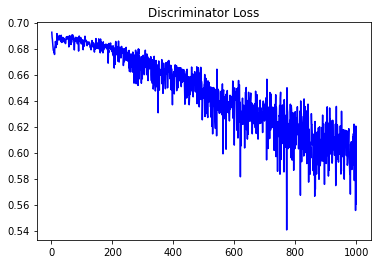

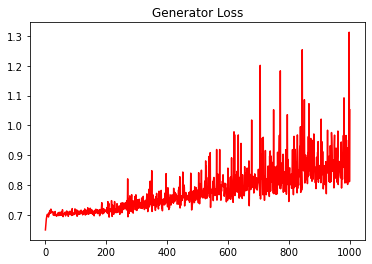

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.4752558282762766


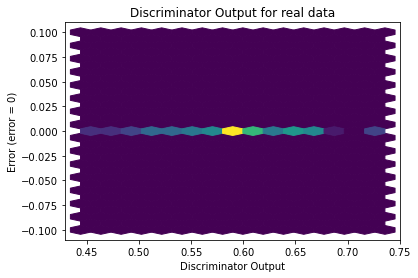

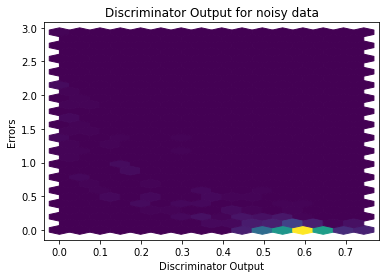

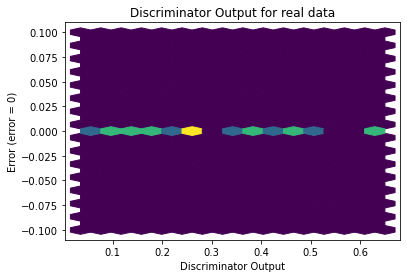

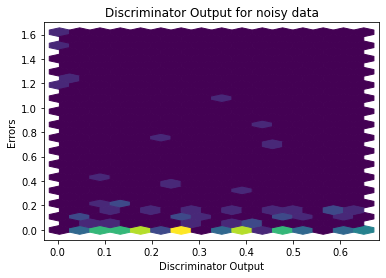

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
# ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [22]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


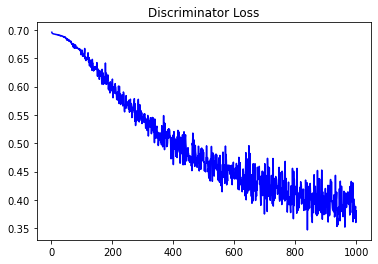

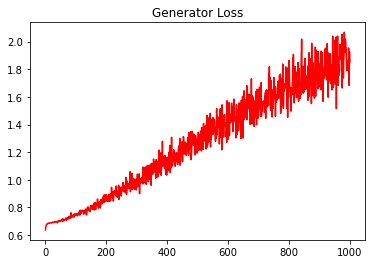

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.31130331527607996


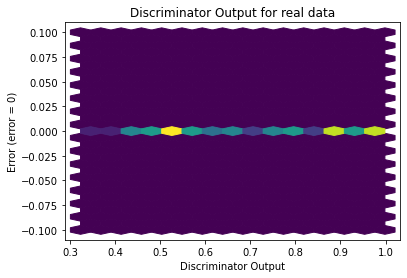

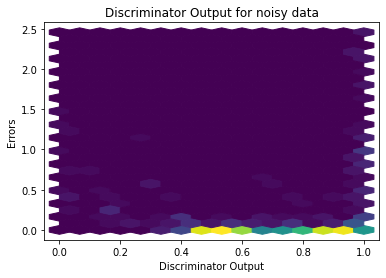

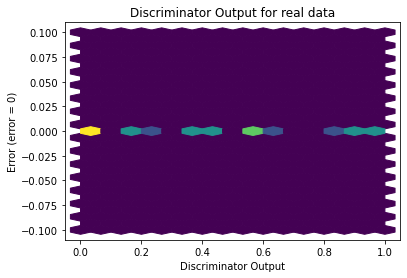

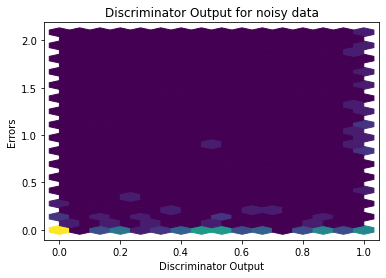

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
